In [57]:
import pandas as pd




df = pd.read_csv('/Users/chaitanyakakade/Desktop/Heart_disease/cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64

In [58]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


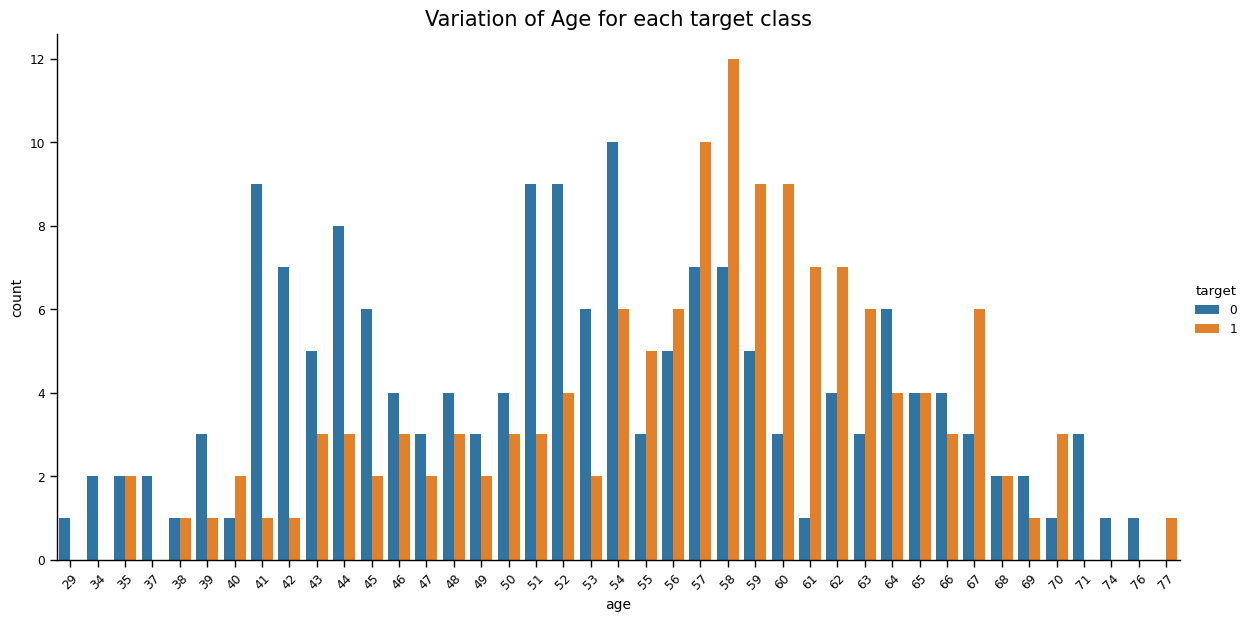

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of target vs age 
sns.set_context("paper", font_scale=1, rc={"font.size": 10, "axes.titlesize": 15, "axes.labelsize": 10})

# Adjust aspect ratio to increase the width
plot = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique(), height=6, aspect=2)
plot.set_xticklabels(rotation=45)
plt.title('Variation of Age for each target class')
plt.show()



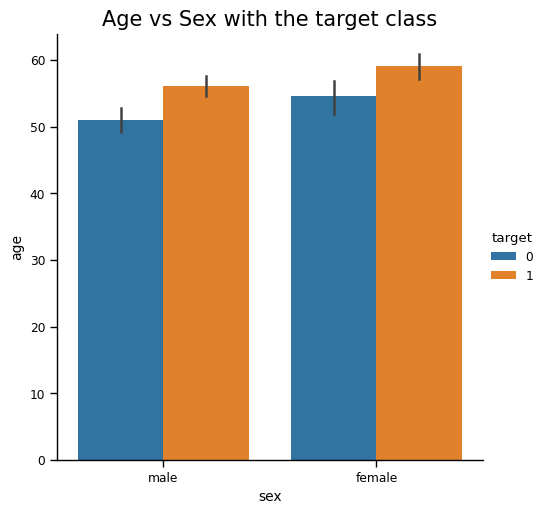

In [26]:


sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Age vs Sex with the target class')
plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})



In [27]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [28]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [43]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.preprocessing import StandardScaler as ss 
sc = ss() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

SVM

In [45]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.9008264462809917
Accuracy for test set for svm = 0.9016393442622951


Tuing SVM model to improve its accuracy

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform Grid Search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train, y_train)

# Best parameters found by Grid Search
print("Best parameters found: ", grid.best_params_)

# Use the best estimator found by Grid Search
classifier = grid.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;


Accuracy for training set for SVM = 0.8471074380165289
Accuracy for test set for SVM = 0.9180327868852459
              precision    recall  f1-score   support

     Class 0       0.90      0.93      0.92        29
     Class 1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Sensitivity:  0.90625
Specificity:  0.9310344827586207


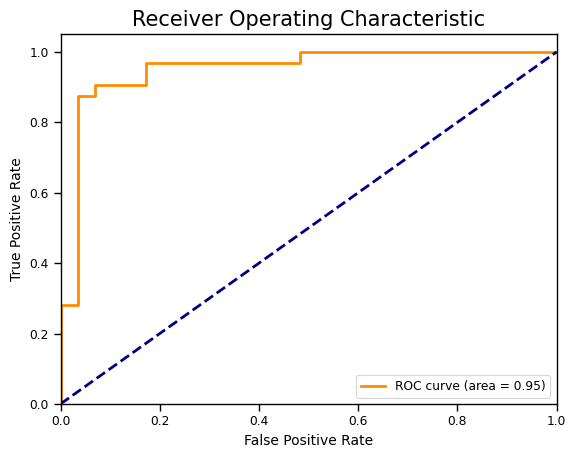

In [47]:
# Train the classifier with the best parameters
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))

# Print accuracy for training and test sets
print()
print('Accuracy for training set for SVM = {}'.format(accuracy_score(y_train, classifier.predict(X_train))))
print('Accuracy for test set for SVM = {}'.format(accuracy_score(y_test, y_pred)))

# Sensitivity, Specificity, and other metrics
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Sensitivity and Specificity from Confusion Matrix
sensitivity = cm_test[1, 1] / (cm_test[1, 1] + cm_test[1, 0])
specificity = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)

# ROC Curve and AUC
y_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [60]:
import shap

# Assuming 'classifier' is your trained SVM model (SVC)

# Create a KernelExplainer object with the trained model and X_train
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP force plot for a single instance
instance_idx = 0  # Example index of the instance to explain

# Initialize javascript for SHAP plots (required for force_plot)
shap.initjs()

# Plot SHAP force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_idx], X_test[instance_idx], feature_names=df.columns[:-1])


AttributeError: predict_proba is not available when probability=False

Naive Bayes

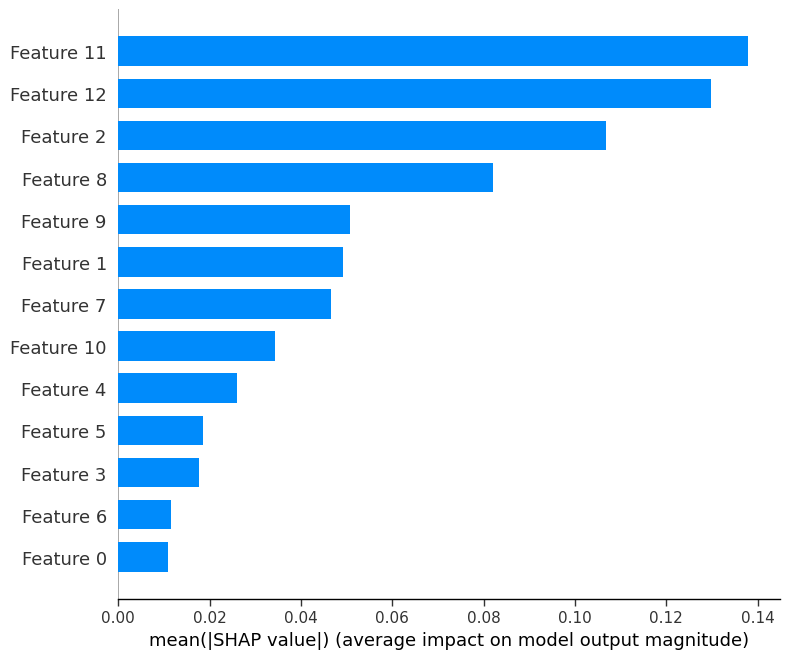

AttributeError: 'PermutationExplainer' object has no attribute 'expected_value'

In [48]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer for the SVM model
explainer = shap.Explainer(classifier.predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed force plot for a single prediction
# Choose an instance (e.g., the first instance in the test set)
instance = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[instance].values, X_test[instance], feature_names=df.columns[:-1])


Logistic regression

In [64]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8471074380165289
Accuracy for test set for Logistic Regression = 0.8852459016393442


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:


#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Random Forest = 0.9834710743801653
Accuracy for test set for Random Forest = 0.6885245901639344


In [69]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for training set for Naive Bayes = 0.8471074380165289
Accuracy for test set for Naive Bayes = 0.8360655737704918


In [70]:

###############################################################################
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score 0.466942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [68]:


from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

NameError: name 'target' is not defined

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
# Initialize the ANN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Adding Batch Normalization for improved training
model.add(Dropout(0.3))  # Increase dropout rate for regularization

# Adding the second hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification
optimizer = Adam(learning_rate=0.001)
# Compiling the ANN
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 128)               1792      
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_16 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 64)              

In [ ]:
# Training the ANN on the Training set
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100


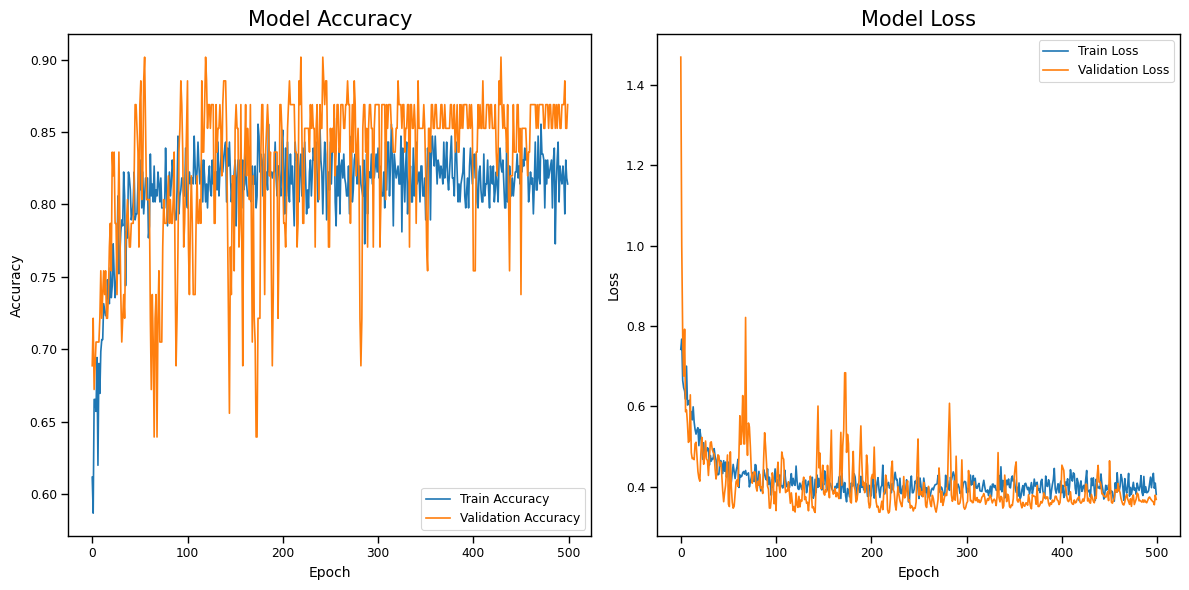

In [113]:
import matplotlib.pyplot as plt

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
pip install pykan


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [31]:
class OneDimSubnet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(OneDimSubnet, self).__init__()
        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, 1)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.01)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(self.activation(self.fc2(x)))
        x = self.dropout(self.activation(self.fc3(x)))
        x = self.fc4(x)
        return x

In [32]:
class KolmogorovArnoldNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_subnets):
        super(KolmogorovArnoldNN, self).__init__()
        self.subnets = nn.ModuleList([OneDimSubnet(1, hidden_dim) for _ in range(num_subnets)])
        self.final_layer = nn.Linear(num_subnets, output_dim)

    def forward(self, x):
        outputs = []
        for i in range(x.size(1)):
            subnet_output = self.subnets[i](x[:, i].unsqueeze(1))
            outputs.append(subnet_output)
        concatenated_outputs = torch.cat(outputs, dim=1)
        final_output = self.final_layer(concatenated_outputs)
        return final_output

In [33]:
class StandardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StandardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
def train_model(model, criterion, optimizer, x, y, num_epochs):
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(x)
        loss = criterion(outputs, y)

        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return loss_history

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
input_dim = X_train.shape[1]
hidden_dim = 5
output_dim = 1
num_epochs = 1000
learning_rate = 0.005
batch_size = 32
num_subnets = input_dim  # Number of subnets should match the input dimension



# Initialize models, loss function and optimizers
kann = KolmogorovArnoldNN(input_dim, hidden_dim, output_dim, num_subnets)
standard_nn = StandardNN(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer_kann = optim.Adam(kann.parameters(), lr=learning_rate)
optimizer_standard_nn = optim.Adam(standard_nn.parameters(), lr=learning_rate)

In [38]:

loss_kann = train_model(kann, criterion, optimizer_kann, X_train, y_train, num_epochs)
loss_standard_nn = train_model(standard_nn, criterion, optimizer_standard_nn,X_train,y_train, num_epochs)


TypeError: 'int' object is not callable

In [39]:
pip install torch scikit-learn moviepy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110720 sha256=453fca6c555725ebd4dfd69c65f5eedf99951bd1dc384ea7ab136697b0434f94
  Stored in directory: /Users/chaitanyakakade/Library/Caches/pip/wheels/83/b1/d9/119ef7c144b44d591ec0a9a140465133c23ea95d2a161184ba
  Created wheel for imageio_ffmpeg: filename=imageio_ffmpeg-0.5.1-py3-none-any.whl size=16723 sha256=fd82e0e60d62ae875d863536ae1ca4f735954cd3dfb819e941f77f3ee89f8d69
  Stored in directory: /Users/chaitanyakakade/Library/Caches/pip/wheels/59/07/0d/8c65b2ed75907f876d8fe99a72b80687371f65d8166b31d8e2
Successfully built moviepy imageio_ffmpeg
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1

[notice] A new release of pip is avail

In [44]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

def load_heart_disease_dataset():
    # Load the dataset
    df = pd.read_csv('/Users/chaitanyakakade/Desktop/Heart_disease/cleveland.csv')  # Adjust the path as needed

    # Handle missing values (if any)
    df = df.dropna()

    # Encode categorical variables
    label_encoders = {}
    for column in ['sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    # Feature scaling
    scaler = StandardScaler()
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'NumVesselsFluro']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Split the dataset
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    train_data_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    train_target_tensor = torch.tensor(y_train.values, dtype=torch.long)
    test_data_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    test_target_tensor = torch.tensor(y_test.values, dtype=torch.long)

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data_tensor, train_target_tensor), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data_tensor, test_target_tensor), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, X_train.shape[1], device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, X_test.shape[1], device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    return dataset

heart_disease_dataset = load_heart_disease_dataset()
print("Train data shape: {}".format(heart_disease_dataset['train_input'].shape))
print("Train target shape: {}".format(heart_disease_dataset['train_label'].shape))
print("Test data shape: {}".format(heart_disease_dataset['test_input'].shape))
print("Test target shape: {}".format(heart_disease_dataset['test_label'].shape))
print("====================================")


cpu


KeyError: 'sex'

In [42]:
from kan import KAN  # Ensure you have the correct package or module for KAN
import torch.nn as nn

def print_example_data_point(dataset):
    # Get column names from the dataset
    column_names = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

    # Get a single data point from the dataset
    example_data_point = dataset['train_input'][0]

    # Get the corresponding target for the example data point
    example_target = int(dataset['train_label'][0])

    # Print column names and their corresponding values
    for i, column_name in enumerate(column_names):
        print(f"{column_name}: {example_data_point[i]}")

    # Print the target value
    print(f"Target (Heart Disease): {example_target}")

print_example_data_point(heart_disease_dataset)

# Creating and Training the KAN
model = KAN(width=[13, 5, 2], grid=5, k=3, seed=0, device=device)  # Adjusting for 13 input features

model(heart_disease_dataset['train_input'])
model.plot(beta=100, scale=1, in_vars=['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'], out_vars=['No Disease', 'Disease'])

def train_acc():
    return torch.mean((torch.argmax(model(heart_disease_dataset['train_input']), dim=1) == heart_disease_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(heart_disease_dataset['test_input']), dim=1) == heart_disease_dataset['test_label']).float())

results = model.train(heart_disease_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10., save_fig=False)

print("Final Training Accuracy:", results['train_acc'][-1])
print("Final Testing Accuracy:", results['test_acc'][-1])

model.plot(scale=1, in_vars=['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'], out_vars=['No Disease', 'Disease'])

# Pruning and fine-tuning the model
model = model.prune()
model(heart_disease_dataset['train_input'])
model.plot(scale=1, in_vars=['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'], out_vars=['No Disease', 'Disease'])

# Fine-tune
results_1 = model.train(heart_disease_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10.)

print("Final Training Accuracy after fine-tuning:", results_1['train_acc'][-1])
print("Final Testing Accuracy after fine-tuning:", results_1['test_acc'][-1])


NameError: name 'heart_disease_dataset' is not defined

In [45]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [46]:
sys.path.append(os.path.abspath('/Users/chaitanyakakade/Downloads/ml_without_tears-master/kan_mlp_from_scratch'))


In [47]:
from feed_forward_network.feedforward import FeedForward
from neuron.neuron_nn import NeuronNN
from neuron.neuron_kan import NeuronKAN
from utils.activations import tanh_act, relu, sigmoid_act
from utils.edge_fun import get_bsplines

In [48]:
%matplotlib inline

In [49]:
folder_fig = './'

color_plots = {'dataset': 'b',
               'kan': 'orange',
               'mlp': 'green'}

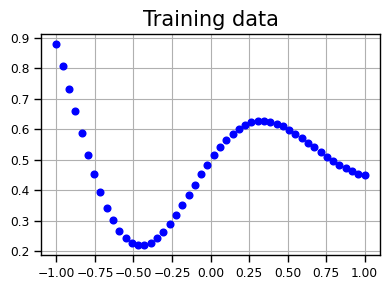

In [50]:
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = .5 * np.sin(4 * x_train) * np.exp(-(x_train+1)) + .5  # damped sinusoid

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'])
ax.set_title('Training data')
ax.grid()
fig.tight_layout()

In [51]:
n_iter_train_1d = 500
loss_tol_1d = .05
seed = 476

In [52]:
kan_1d = FeedForward([1, 2, 2, 1],  # layer size
                  eps=.01,  # gradient descent parameter
                  n_weights_per_edge=7,  # n. edge functions
                  neuron_class=NeuronKAN, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=seed,
                  weights_range=[-1, 1])
kan_1d.train(x_train, 
          y_train, 
          n_iter_max=n_iter_train_1d, 
          loss_tol=loss_tol_1d)

 19%|▏| 95/500 [00:01<00:05, 68.87it/s, loss: 0.049. Convergence has been attain


In [53]:
mlp_1d = FeedForward([1, 13, 1],  # layer size
                  eps=.005,  # gradient descend parameter
                  activation=relu,  # activation type (ReLU, tanh or sigmoid)
                  neuron_class=NeuronNN, 
                  seed=seed,
                  weights_range=[-.5, .5])
mlp_1d.train(x_train, 
             y_train, 
             n_iter_max=n_iter_train_1d, 
             loss_tol=loss_tol_1d)

 98%|▉| 489/500 [00:03<00:00, 128.48it/s, loss: 0.050. Convergence has been atta


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from feed_forward_network.feedforward import FeedForward
from neuron.neuron_kan import NeuronKAN
from neuron.neuron_nn import NeuronNN
from loss.cross_entropy_loss import CrossEntropyLoss
from utils.activations import tanh_act
from utils.edge_fun import get_bsplines
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/chaitanyakakade/Desktop/Heart_disease/cleveland.csv.csv')

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the dataset
X = df.drop('Heart Disease', axis=1).values
y = df['Heart Disease'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model parameters
n_iter_train_cl = int(1e3)
loss_tol_cl = 1.5
seed = 476

# Train KAN model
kan_cl = FeedForward([X_train.shape[1], 2],  # layer size
                     eps=.02,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=NeuronKAN, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=seed,
                     weights_range=[-1, 1])

kan_cl.train(X_train, 
             y_train.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)

# Train MLP model
mlp_cl = FeedForward([X_train.shape[1], 10, 10, 2],  # layer size
                     eps=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=NeuronNN, 
                     loss=CrossEntropyLoss,
                     seed=seed, 
                     weights_range=[-1, 1])

mlp_cl.train(X_train, 
             y_train.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)

# Define softmax function
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

# Prepare meshgrid for decision boundary visualization
X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

# Generate predictions for KAN and MLP models
Y_kan_cl = np.array([softmax(kan_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)

# Visualize training data and decision boundaries
fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12, 3))

ax_cl[0].scatter(*X_train.T[:2], c=y_train, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')
ax_cl[0].set_xlabel('input feature 1')
ax_cl[0].set_ylabel('input feature 2')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*X_train.T[:2], c=y_train, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')
ax_cl[1].set_xlabel('input feature 1')
ax_cl[1].set_ylabel('input feature 2')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*X_train.T[:2], c=y_train, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')
ax_cl[2].set_xlabel('input feature 1')
ax_cl[2].set_ylabel('input feature 2')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
fig_cl.tight_layout()
plt.show()

# Visualize loss evolution
fig1, ax1 = plt.subplots(figsize=(4, 3))
ax1.plot(kan_cl.loss_hist, '-', label='KAN')
ax1.plot(mlp_cl.loss_hist, '-', label='MLP')
ax1.plot(loss_tol_cl * np.ones(max(len(mlp_cl.loss_hist), len(kan_cl.loss_hist))), '--k')
ax1.grid()
ax1.set_ylabel('cross-entropy loss')
ax1.set_xlabel('iteration', fontsize=13)
ax1.legend()
ax1.set_title('Loss evolution')
fig1.tight_layout()
plt.show()


In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from feed_forward_network.feedforward import FeedForward
from neuron.neuron_kan import NeuronKAN
from neuron.neuron_nn import NeuronNN
from loss.cross_entropy_loss import CrossEntropyLoss
from utils.activations import tanh_act
from utils.edge_fun import get_bsplines
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/chaitanyakakade/Desktop/Heart_disease/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Handle missing values and map target values
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())


In [60]:
label_encoders = {}
for column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the dataset
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
len(X_train)

242

In [83]:
n_iter_train_cl = int(10)
loss_tol_cl = 0.05
seed = 476

# Train KAN model
kan_cl = FeedForward([X_train.shape[1], 2],  # layer size
                     eps=.05,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=NeuronKAN, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=seed,
                     weights_range=[-1, 1])

In [84]:
kan_cl.train(X_train, 
             y_train.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)


100%|████████████████████████████| 10/10 [00:03<00:00,  2.58it/s, loss: 217.301]


In [65]:
mlp_cl = FeedForward([X_train.shape[1], 10, 10, 2],  # layer size
                     eps=.01,  # gradient descend parameter
                     activation=relu,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=NeuronNN, 
                     loss=CrossEntropyLoss,
                     seed=seed, 
                     weights_range=[-1, 1])

In [66]:
mlp_cl.train(X_train, 
             y_train.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)

100%|████████████████████████| 1000/1000 [00:43<00:00, 23.17it/s, loss: 167.742]


ValueError: operands could not be broadcast together with shapes (13,8) (2,8) 